In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import requests
from PIL import Image
import io

def upload_image():
    """
    Handles image upload in Colab
    Returns the image path
    """
    print("Please upload an image file...")
    uploaded = files.upload()

    if uploaded:
        filename = list(uploaded.keys())[0]
        print(f"Successfully uploaded: {filename}")
        return filename

def analyze_histograms(image_path):
    """
    Analyze and display histograms for both grayscale and color images
    """
    img = cv2.imread(image_path)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    hist_gray = cv2.calcHist([gray], [0], None, [256], [0, 256])

    hist_gray_norm = hist_gray / (gray.shape[0] * gray.shape[1])

    colors = ('b', 'g', 'r')
    color_hists = []

    for i, color in enumerate(colors):
        hist = cv2.calcHist([img], [i], None, [256], [0, 256])
        color_hists.append(hist)

    plt.figure(figsize=(20, 15))

    # Original color image
    plt.subplot(3, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image', fontsize=14)
    plt.axis('off')

    # Grayscale image
    plt.subplot(3, 2, 2)
    plt.imshow(gray, cmap='gray')
    plt.title('Grayscale Image', fontsize=14)
    plt.axis('off')

    # Grayscale histogram (count)
    plt.subplot(3, 2, 3)
    plt.plot(hist_gray)
    plt.title('Grayscale Histogram (Pixel Count)', fontsize=14)
    plt.xlabel('Intensity Level')
    plt.ylabel('Pixel Count')
    plt.grid(True)

    # Grayscale histogram (probability)
    plt.subplot(3, 2, 4)
    plt.plot(hist_gray_norm)
    plt.title('Grayscale Histogram (Probability)', fontsize=14)
    plt.xlabel('Intensity Level')
    plt.ylabel('Probability')
    plt.grid(True)

    # Color histograms
    plt.subplot(3, 2, 5)
    for hist, color in zip(color_hists, colors):
        plt.plot(hist, color=color)
    plt.title('Color Channels Histograms', fontsize=14)
    plt.xlabel('Intensity Level')
    plt.ylabel('Pixel Count')
    plt.grid(True)
    plt.legend(['Blue', 'Green', 'Red'])

    # Histogram equalization
    equalized = cv2.equalizeHist(gray)
    plt.subplot(3, 2, 6)
    plt.imshow(equalized, cmap='gray')
    plt.title('Histogram Equalized Image', fontsize=14)
    plt.axis('off')

    plt.tight_layout()
    plt.show()

def fourier_transform_analysis(image_path, rotation_angle=45):
    """
    Perform FFT analysis including rotation property verification
    """
    img = cv2.imread(image_path, 0)

    f_transform = np.fft.fft2(img)
    f_shift = np.fft.fftshift(f_transform)
    magnitude_spectrum = 20 * np.log(np.abs(f_shift))

    # Rotate image
    rows, cols = img.shape
    M = cv2.getRotationMatrix2D((cols/2, rows/2), rotation_angle, 1)
    rotated = cv2.warpAffine(img, M, (cols, rows))

    # Compute FFT of rotated image
    f_transform_rot = np.fft.fft2(rotated)
    f_shift_rot = np.fft.fftshift(f_transform_rot)
    magnitude_spectrum_rot = 20 * np.log(np.abs(f_shift_rot))

    # Inverse FFT
    f_ishift = np.fft.ifftshift(f_shift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)

    plt.figure(figsize=(20, 15))

    plt.subplot(2, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image', fontsize=14)
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Magnitude Spectrum', fontsize=14)
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.imshow(img_back, cmap='gray')
    plt.title('Reconstructed Image', fontsize=14)
    plt.axis('off')

    plt.subplot(2, 3, 4)
    plt.imshow(rotated, cmap='gray')
    plt.title(f'Rotated Image ({rotation_angle}°)', fontsize=14)
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.imshow(magnitude_spectrum_rot, cmap='gray')
    plt.title('Magnitude Spectrum of Rotated Image', fontsize=14)
    plt.axis('off')

    plt.tight_layout()
    plt.show()

Please upload an image file...


Saving NBX_Snapshot_2024-09-19_20-58-01-550.png to NBX_Snapshot_2024-09-19_20-58-01-550.png
Successfully uploaded: NBX_Snapshot_2024-09-19_20-58-01-550.png

Task 1: Histogram Analysis


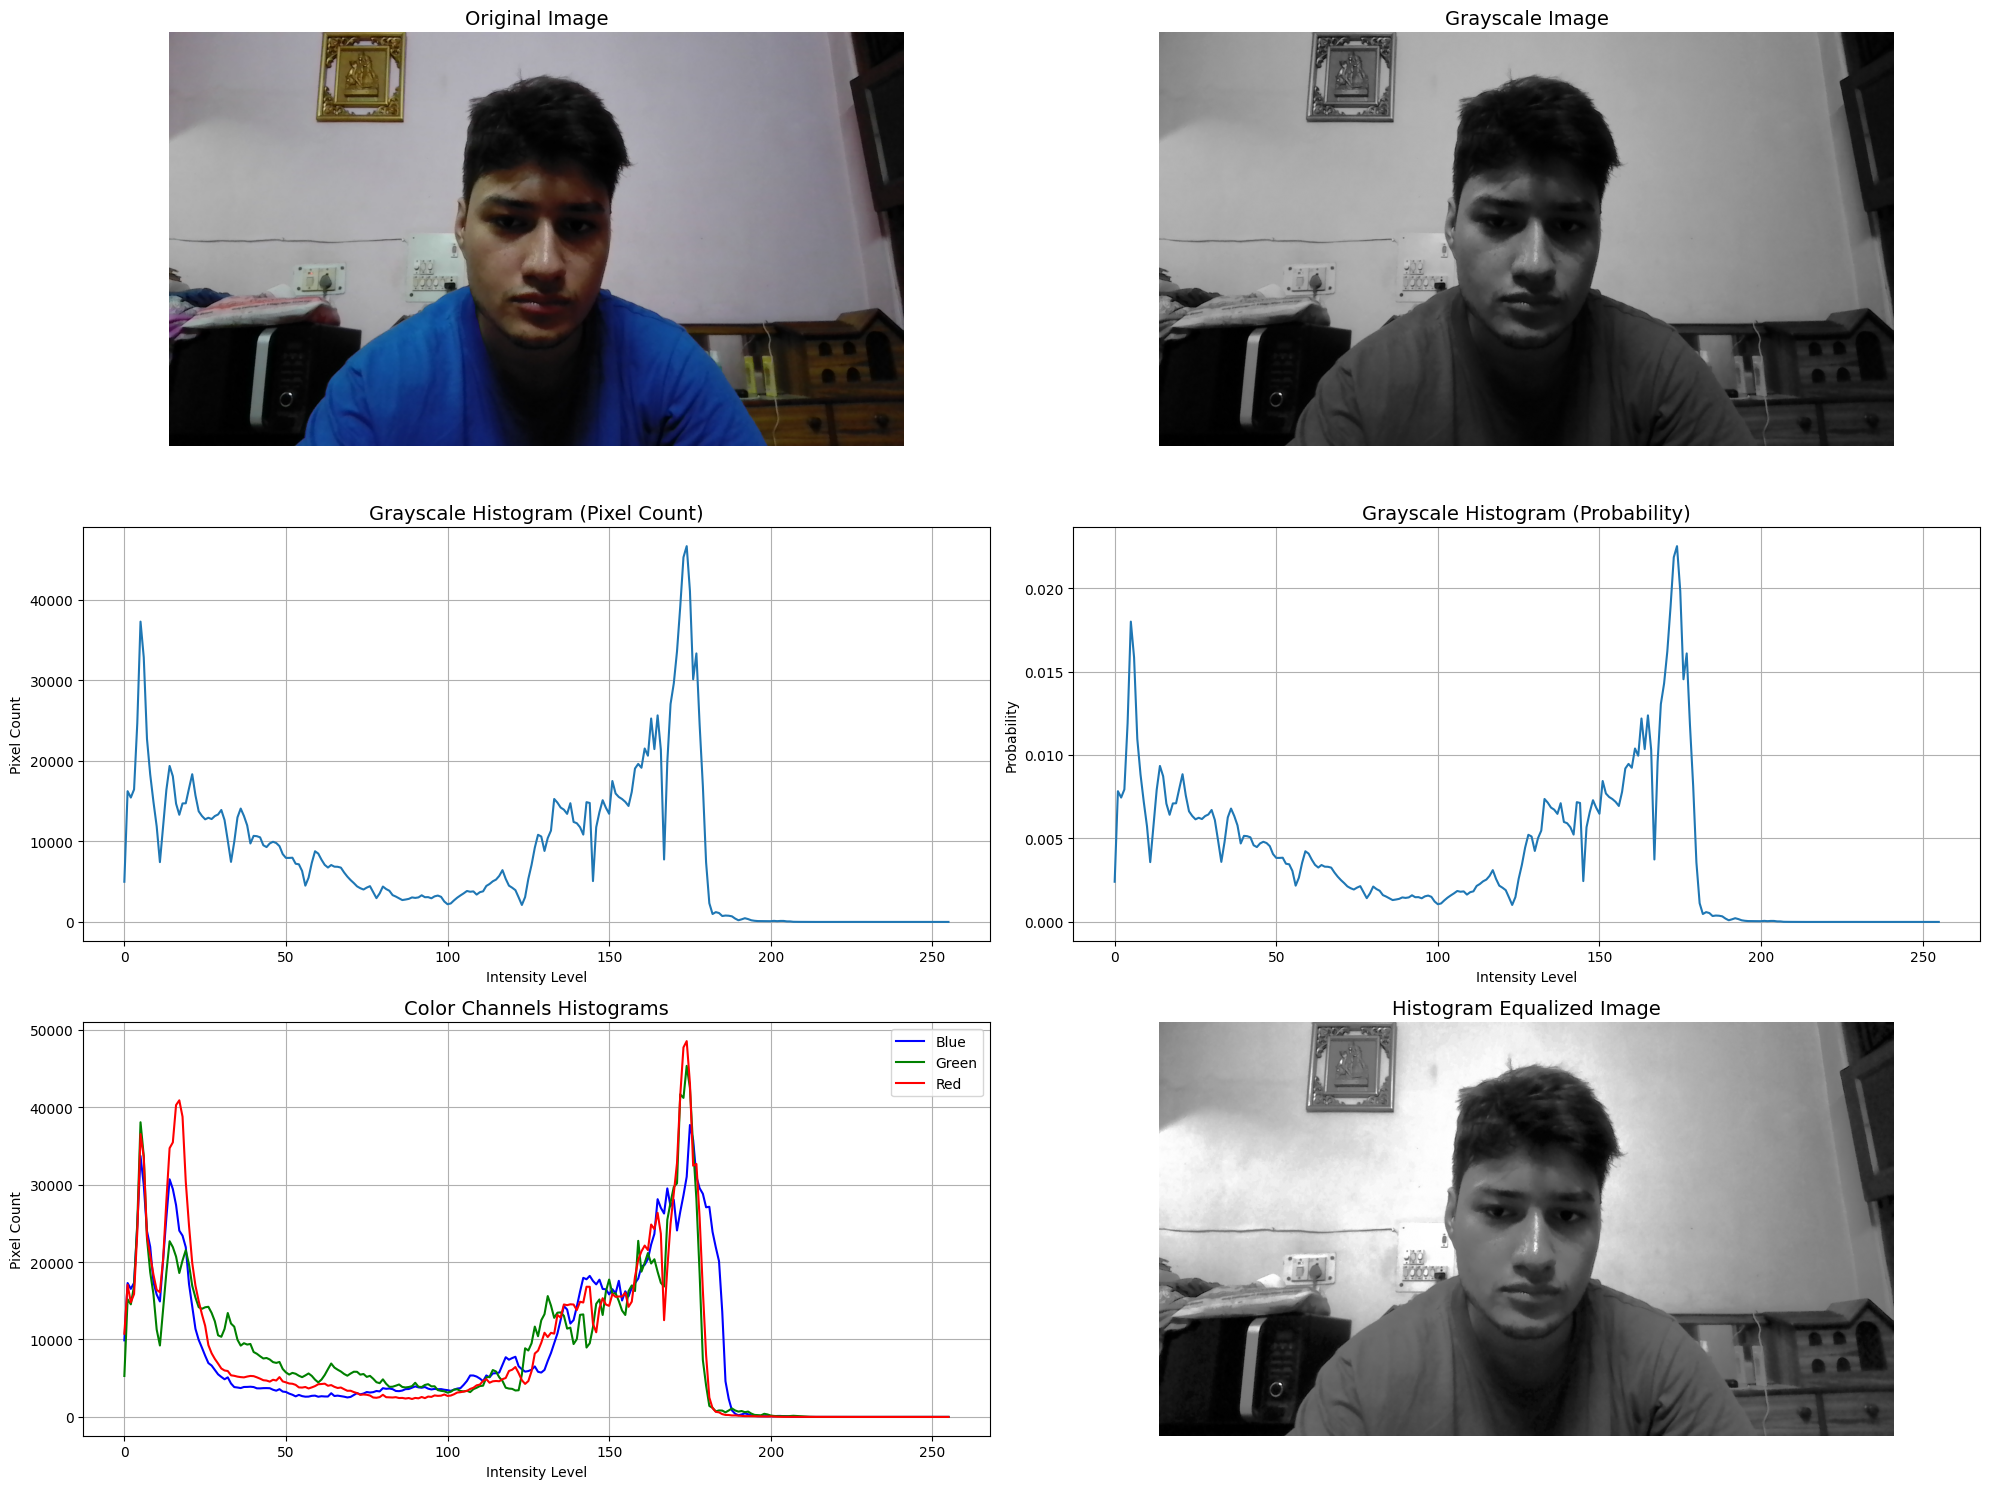


Task 2: Fourier Transform Analysis


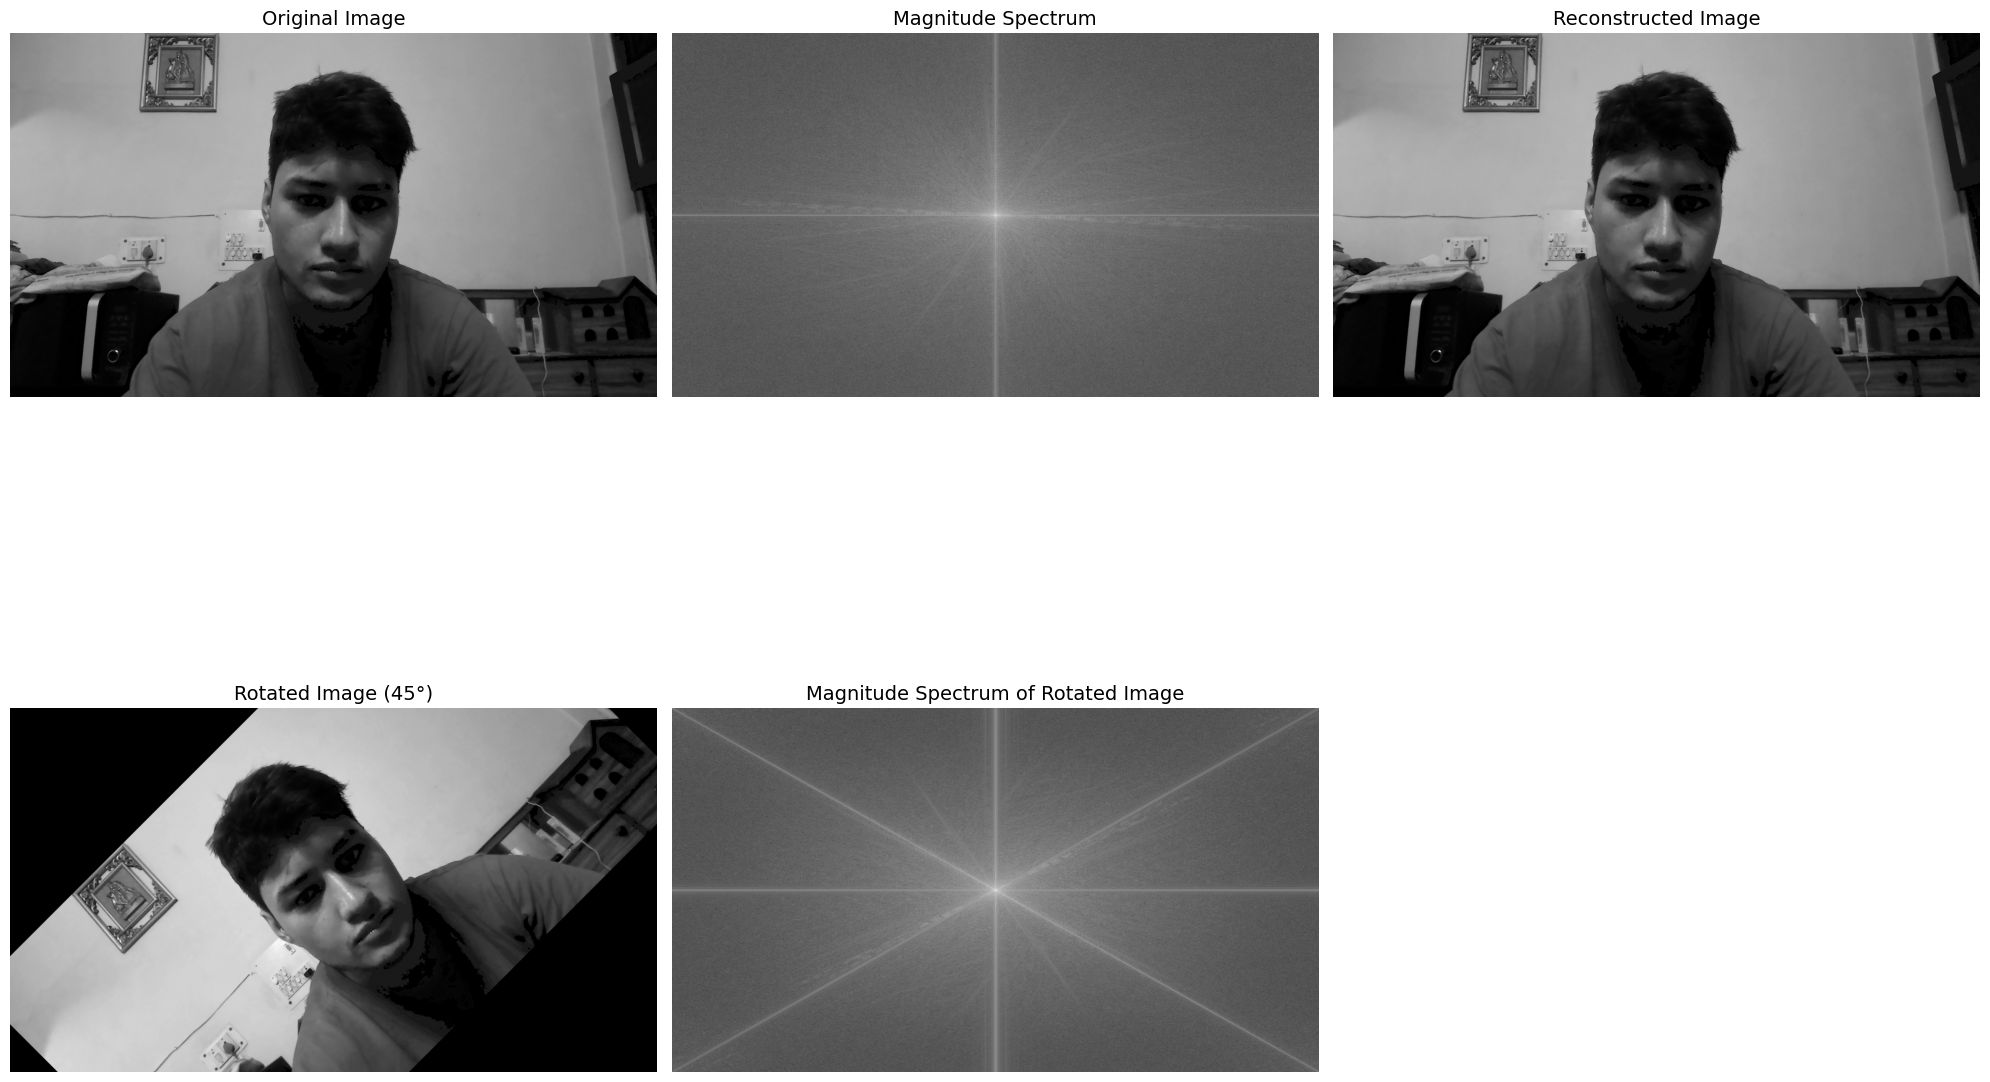

In [5]:
image_path = upload_image()

print("\nTask 1: Histogram Analysis")
analyze_histograms(image_path)

print("\nTask 2: Fourier Transform Analysis")
fourier_transform_analysis(image_path)